# 
<h1 style="text-align:center;">Mall Customer Segmentation</h1>

<hr style="height:2px; background-color:black; border:none;">

<h4 style="text-align:center;">Descriptive Analysis</h4>

<hr style="height:2px; background-color:black; border:none;">

In [269]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
customers = pd.read_csv('Mall_Customers.csv', header=0,
                        names=['id', 'gender', 'age', 'annual_income', 'spending_score'],
                        index_col='id')
customers

,gender,age,annual_income,spending_score
id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


Notes:
- The annual_income column is in the thousands of dollars, so a value of 28 represents an annual income of $28,000.
- The spending_score values are representations of the amount any given customer spends. They range from 1 to 100, with 1 being the least spending and 100 being the most.

In [271]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [272]:
customers.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [273]:
#mean, minimum, and maximum for our numeric columns
customers.drop(labels='gender',axis=1).agg(['mean','min','max'])

,age,annual_income,spending_score
mean,38.85,60.56,50.2
min,18.00,15.00,1.0
max,70.00,137.00,99.0


In [274]:
#dispaly gender unique values
customers['gender'].unique()

array(['Male', 'Female'], dtype=object)

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Mean by gender for numeric values</h6>

<hr style="height:2px; background-color:black; border:none;">

<Axes: xlabel='gender'>

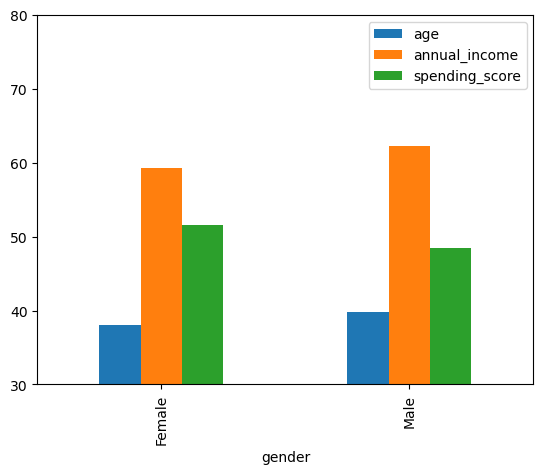

In [276]:
# Group the 'customers' DataFrame by the 'gender' column,
# calculate the mean of all numerical columns for each gender group,
# then plot the resulting means as a bar chart with the y-axis ranging from 30 to 80.
customers.groupby('gender').mean().plot.bar(ylim=(30,80))

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Males and Females Distribution</h6>

<hr style="height:2px; background-color:black; border:none;">

gender
Female    112
Male       88
Name: count, dtype: int64


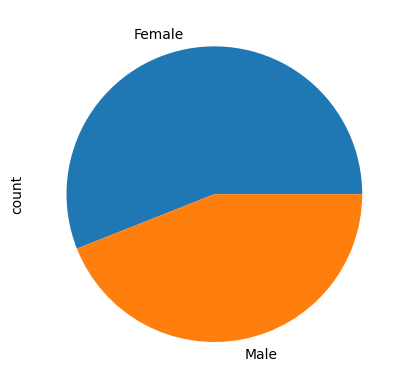

In [278]:
# Count the number of occurrences for each unique value in the 'gender' column
counts= customers['gender'].value_counts()
# Plot the counts as a pie chart
counts.plot.pie()
# Print the counts
print(counts)

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Age group and Income Frequencies</h6>

<hr style="height:2px; background-color:black; border:none;">

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

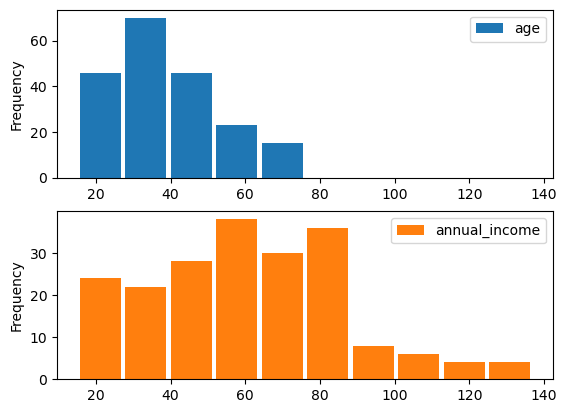

In [280]:
# Create separate histogram plots for the 'age' and 'annual_income' columns
# 'subplots=True' creates individual plots for each column
# 'rwidth=0.9' sets the relative width of the bars to 90% of the bin width
# 'sharex=False' ensures each subplot has its own x-axis scale
customers[['age','annual_income']].plot.hist(subplots=True,rwidth=0.9,sharex=False)

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Income vs. Spending by Gender</h6>

<hr style="height:2px; background-color:black; border:none;">

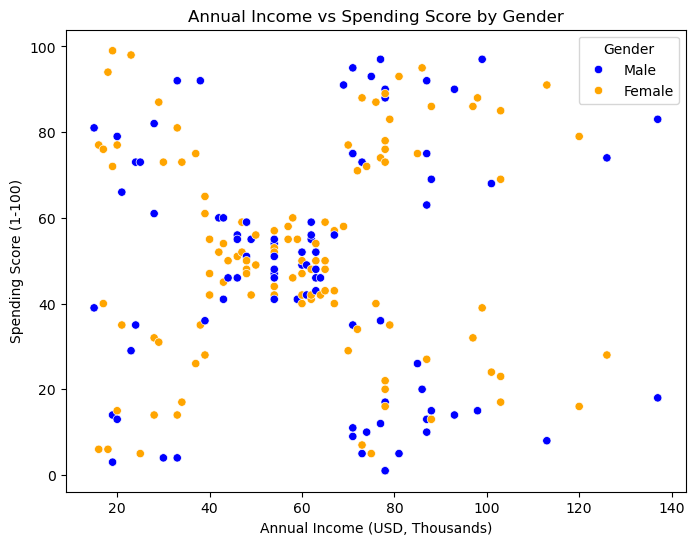

In [341]:
# income vs. spending, color-coded by gender.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=customers, 
    x='annual_income', 
    y='spending_score', 
    hue='gender', 
    palette={'Male': 'blue', 'Female': 'orange'}
)
plt.title('Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (USD, Thousands)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()


<hr style="height:2px; background-color:black; border:none;">

<h4 style="text-align:center;">K-Means Clustering</h4>

<hr style="height:2px; background-color:black; border:none;">

In [284]:
# Import the KMeans clustering algorithm from scikit-learn
from sklearn.cluster import KMeans
# Define the list of numerical columns to use for clustering
num_cols=['age','annual_income','spending_score']
# Create a new DataFrame 'X' containing only the selected numerical columns from 'customers'
X= customers[num_cols]
#Create a KMeans clustering model(instance)
kmeans_model = KMeans()
# Fit the KMeans model to the data in 'X'
# This step performs the clustering by finding cluster centers and assigning data points to clusters
kmeans_model.fit(X)


,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [285]:
# Use the trained KMeans model to predict the cluster labels for the first 5 rows of the dataset 'X'
kmeans_model.predict(X[:5])

array([5, 4, 5, 4, 5])

In [286]:
# Access the coordinates of the cluster centers (centroids) found by the KMeans model
# Each row in the output represents the center of a cluster
kmeans_model.cluster_centers_

array([[ 63.90909091,  53.04545455,  50.63636364],
       [ 24.80645161,  55.32258065,  50.16129032],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 39.36363636,  79.13636364,  13.36363636],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 44.14285714,  25.14285714,  19.52380952],
       [ 42.63636364, 108.18181818,  21.27272727],
       [ 46.9375    ,  57.1875    ,  46.375     ]])


<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Evaluating Performance with Inertia</h6>

<hr style="height:2px; background-color:black; border:none;">

In [288]:
# Get the inertia value of the KMeans model
kmeans_model.inertia_

48395.614560171

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Preprocessing</h6>

<hr style="height:2px; background-color:black; border:none;">

In [290]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
sklearn.set_config(display='diagram')

In [291]:
num_cols=['age','annual_income','spending_score']
# Print the first 5 rows of the original feature data (before scaling)
print(X[:5])
# Create a StandardScaler object to standardize the features
scaler=StandardScaler()
# Fit the scaler to the first 5 rows and transform them
print(scaler.fit_transform(X[:5]))

    age  annual_income  spending_score
id                                    
1    19             15              39
2    21             15              81
3    20             16               6
4    23             16              77
5    31             17              40
[[-0.88205286 -1.06904497 -0.34653653]
 [-0.41781451 -1.06904497  1.16956078]
 [-0.64993368  0.26726124 -1.53775583]
 [ 0.04642383  0.26726124  1.02517056]
 [ 1.90337722  1.60356745 -0.31043897]]


In [292]:
# Create a column transformer that applies the 'scaler' (StandardScaler)
# only to the columns listed in 'num_cols' (e.g., ['age', 'annual_income', 'spending_score'])
# Other columns in the DataFrame will be left untouched by default
preprocessor = make_column_transformer((scaler,num_cols))
# Fit the transformer to the entire 'customers' DataFrame and transform it
# Then print the first 5 rows of the transformed data
# Only the specified numerical columns are scaled (standardized); other columns are ignored
print(preprocessor.fit_transform(customers)[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Pipline Construction</h6>

<hr style="height:2px; background-color:black; border:none;">

In [294]:
# Create a pipeline that first applies the 'preprocessor' (which scales the selected numeric columns)
# and then fits a KMeans clustering model with a fixed random seed (random_state=0 for reproducibility)
kmeans_model=make_pipeline(preprocessor,KMeans(random_state=0))
# Display the pipeline object (this shows the steps included: preprocessing + KMeans)
kmeans_model

,steps,"[('columntransformer', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [295]:
# Access the KMeans step from the pipeline using 'named_steps'
# Then get the inertia value from the fitted KMeans model
kmeans_model.fit(customers)

,steps,"[('columntransformer', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [296]:
# Access the 'kmeans' step from the fitted pipeline 'kmeans_model'
# Retrieve the inertia value from the KMeans model
kmeans_model.named_steps['kmeans'].inertia_

112.92246508652957

<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Optimal Cluster Search Using Elbow Method</h6>

<hr style="height:2px; background-color:black; border:none;">

In [332]:
from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.palettes import Colorblind
output_notebook() 
inertias=[]
k_vals= list(range(1,10))
for k in k_vals:
    kmeans_model.set_params(kmeans__n_clusters=k)
    kmeans_model.fit(customers)
    inertias.append(kmeans_model.named_steps['kmeans'].inertia_)

# Plot the inertias at each value of k
elbow = figure(title='Customer KMeans Elbow Method', x_axis_label='k', y_axis_label='Inertia')
elbow.circle(k_vals, inertias)
elbow.line(k_vals, inertias)
show(elbow)

Loading BokehJS ...

In [334]:
# Set the optimal number of clusters
optimal_k = 4
kmeans_model.set_params(kmeans__n_clusters=optimal_k)
# Fit the pipeline (preprocessing + KMeans) to the 'customers' dataset
kmeans_model.fit(customers)
# Print the inertia of the fitted KMeans model
print("Inertia:\t\t",kmeans_model.named_steps['kmeans'].inertia_)


Inertia:		 252.6029264752326


<hr style="height:2px; background-color:black; border:none;">

<h6 style="text-align:center;">Model Fitting & Prediction</h6>

<hr style="height:2px; background-color:black; border:none;">

In [343]:

# Create a new column 'category' in the DataFrame 'customers'
# Assign each customer to a cluster using the pipeline (preprocessing + KMeans) with fit_predict()
customers['category']= kmeans_model.fit_predict(customers)

# Get the unique cluster labels (segments) and sort them in ascending order
segments= customers['category'].unique()
segments.sort()

# Create a Bokeh figure for plotting customer segments
# The plot will compare Annual Income (x-axis) and Spending Score (y-axis)
segments_fig = figure(title= 'Customer Segments | Annual Income and Spending Score',x_axis_label='Annual Income',y_axis_label='Spending Score')

# Choose a color palette based on the len of 'segments'
palette= Colorblind[len(segments)]


# Extract the annual income,age and spending score columns
income= customers['annual_income']
spend= customers['spending_score']


# Loop through each cluster (segment)
for i,segment in enumerate(segments):
     # Create a boolean mask for rows belonging to the current segment
    indices = customers['category']== segment

    # Plot the points for this segment with its assigned color and legend label
    segments_fig.scatter(
        income[indices],
        spend[indices],
        color=palette[i],
        legend_label=('Segment'+str(segment)))
    
# Display the plot
show(segments_fig)
